In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stroke = pd.read_csv("../00-data/healthcare-dataset-stroke-data.csv")

stroke


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
def pca (X, k=2):
  # standardizzazione
  X = (X-X.mean(axis=0))/X.std(axis=0)
  # calcolo matrice varianza/covarianza
  cov_mat = np.cov(X.T)
  #autovalori autovettori
  eig_vals, eig_vecs = np.linalg.eig(cov_mat)
  # prendo i k indici con maggiore varianza
  top_k_indexes = np.argsort(eig_vals)[:(-(k+1)):-1]
  # prendo gli autovettori associati a quegli indici
  W = eig_vecs[:,top_k_indexes]
  # sfrutto il prodotto tra matrici per selezionre solo gli elementi che mi servono
  return np.dot(X,W)
  

splitto X e y

In [4]:
X = stroke.drop(['stroke', 'id'], axis=1)

y = stroke['stroke'].values

effettuo il 1 hot encoding

In [5]:
toOHEncoding = [ 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in toOHEncoding:
  dummies = pd.get_dummies(X[col], prefix=col, dtype=int)
  X = pd.concat([X.drop(columns=[col]), dummies], axis=1)
    
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [6]:
X.isnull().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
gender_Female                       0
gender_Male                         0
gender_Other                        0
ever_married_No                     0
ever_married_Yes                    0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Rural                0
Residence_type_Urban                0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [7]:
df_all = pd.concat([X, pd.Series(y, name='stroke')], axis=1)

df_all = df_all.dropna()

X = df_all.drop(columns=['stroke'])
y = df_all['stroke']

In [8]:
X = X.dropna()
X.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [9]:
X_2d = pca(X)

Text(0, 0.5, 'Seconda componente principale')

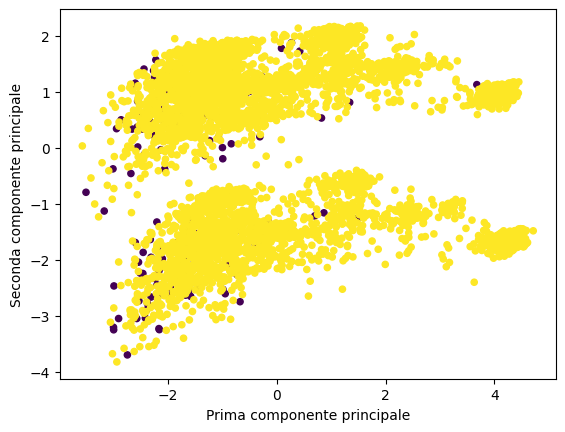

In [10]:
plt.scatter(X_2d[:,0], X_2d[:,1], s=20, c=1-y, cmap='viridis')
plt.xlabel("Prima componente principale")
plt.ylabel("Seconda componente principale")

In [11]:
X_3d = pca(X, k=3)

In [12]:
X_3d

array([[-2.57325611, -3.05152135,  1.05757172],
       [-2.18309272, -1.77139944, -1.78408775],
       [-1.57874163,  0.82926073,  1.49301997],
       ...,
       [-1.00388733,  1.30325167, -1.23097686],
       [-1.2037325 , -1.88293639, -1.64986911],
       [ 0.03538029,  0.67227631,  1.67233559]], shape=(4909, 3))

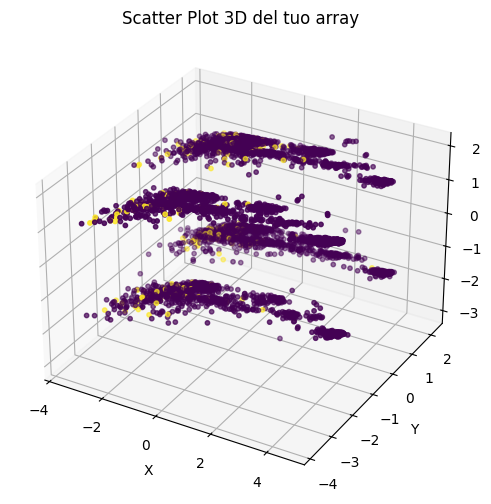

In [13]:
# Estrai le tre dimensioni
x1 = X_3d[:, 0]
x2 = X_3d[:, 1]
x3 = X_3d[:, 2]

# Crea il grafico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x1, x2, x3, c=y, cmap='viridis', marker='o', s=10)

# Etichette
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Scatter Plot 3D del tuo array')

plt.show()

In [16]:
df_all

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
5,81.0,0,0,186.21,29.0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
5107,35.0,0,0,82.99,30.6,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0


In [18]:
stroke_no_gender = df_all.drop(['gender_Male', 'gender_Female', 'gender_Other'], axis=1)

stroke_no_gender

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,0,1,0,0,1,0,0,0,1,0,1,0,0,1
2,80.0,0,1,105.92,32.5,0,1,0,0,1,0,0,1,0,0,0,1,0,1
3,49.0,0,0,171.23,34.4,0,1,0,0,1,0,0,0,1,0,0,0,1,1
4,79.0,1,0,174.12,24.0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
5,81.0,0,0,186.21,29.0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,1,0,0,0,0,0,1,1,0,1,0,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,1,0,0,0,1,0,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,0,0,1,0,0,1,0,0,0


In [20]:
X_no_gender = stroke_no_gender.drop('stroke', axis=1)
y_no_gender = stroke_no_gender['stroke'].values

In [21]:
X_no_gender

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,1,0,0,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,0,0,1,0,0,1,0,0


In [22]:
y_no_gender

array([1, 1, 1, ..., 0, 0, 0], shape=(4909,))

In [23]:
X_2d_no_gender = pca(X_no_gender)

In [32]:
X_2d_no_gender_0 = X_2d_no_gender[y_no_gender == 0]
X_2d_no_gender_1 = X_2d_no_gender[y_no_gender == 1]

C:\Users\David\AppData\Local\Temp\ipykernel_23028\4194215748.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_2d_no_gender_0[:,0], X_2d_no_gender_0[:,1], s=20, cmap='viridis')
C:\Users\David\AppData\Local\Temp\ipykernel_23028\4194215748.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_2d_no_gender_1[:,0], X_2d_no_gender_1[:,1], s=20, cmap='viridis')


Text(0, 0.5, 'Seconda componente principale')

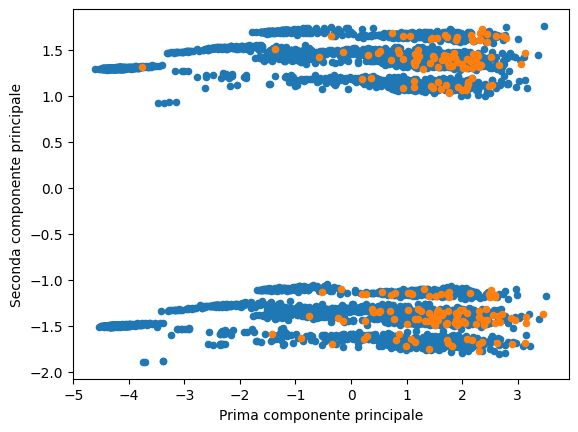

In [36]:
plt.scatter(X_2d_no_gender_0[:,0], X_2d_no_gender_0[:,1], s=20, cmap='viridis')
plt.scatter(X_2d_no_gender_1[:,0], X_2d_no_gender_1[:,1], s=20, cmap='viridis')

plt.xlabel("Prima componente principale")
plt.ylabel("Seconda componente principale")